# Importing Stuff

In [1]:
import sys
import os

# Get the absolute path of the project root directory
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))


# Add the project root directory to the Python path
sys.path.append(project_root)

In [2]:
import pandas as pd

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

# Define the path to the data directory
data_dir = os.path.join(project_root, 'data')

# Example: Access a specific data file in the data directory
data_file_path = os.path.join(data_dir, 'MAR_per_OAR_for_patients.csv')
df = pd.read_csv(data_file_path)

df['Targ'] = df['MAR'] > 3.5
data = df[['95HD', 'VolDice', 'SurfDist','JaccardIndex', 'APL', 'FNPL', 'FNV', 'Targ', 'OAR', 'patient', 'MAR']]


# Run Analysis witout a config file

In [14]:
from AutoML.analyzer import AutoMLAnalyzer

analyzer = AutoMLAnalyzer(data, target_variable='Targ', output_dir='./analysis_output')

analyzer.run()

/home/oem/Documents/CDI/AutoML/AutoML/analyzer.py:98: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data[col] = pd.to_datetime(self.data[col])
/home/oem/Documents/CDI/AutoML/AutoML/analyzer.py:98: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data[col] = pd.to_datetime(self.data[col])


Config file not found, used a heuristic to define categorical and continuous columns. Please review!
Categorical: ['patient', 'OAR', 'Targ']

Continuous: ['SurfDist', 'FNV', 'JaccardIndex', 'APL', 'MAR', '95HD', 'FNPL', 'VolDice']

Config file not found, checking for outliers in categorical variables...
  - Outliers found in patient: ['RADCURE-3521: 2 out of 380', 'RADCURE-3689: 2 out of 380', 'RADCURE-3929: 2 out of 380', 'RADCURE-3425: 2 out of 380', 'RADCURE-2976: 2 out of 380', 'RADCURE-3698: 2 out of 380']
  - No Outliers found in OAR
  - No Outliers found in Targ
Applying changes from config file...

╒═════════════════════════╤════════════════╤═══════════╤═════════════════╕
│                         │                │ Missing   │ Overall         │
╞═════════════════════════╪════════════════╪═══════════╪═════════════════╡
│ n                       │                │           │ 380             │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ SurfDist,

# Run with edited config.yaml
Here I moved patient from categorical to other

In [9]:
import yaml
import pprint 

pp = pprint.PrettyPrinter(indent=4)

with open('analysis_output/config.yaml', 'r') as f:
    config = yaml.safe_load(f)

print('\nGENERATED CONFIG:\n')
pp.pprint(config)

config['columns']['categorical'].remove('patient')
config['mapping'].pop('patient')
config['columns']['other'].append('patient')

print('\nUPDATED CONFIG:\n')
pp.pprint(config)

if not os.path.exists('./analysis_updated'):
    os.mkdir('./analysis_updated')
with open('analysis_updated/config.yaml', 'w') as f:
    yaml.dump(config, f)



GENERATED CONFIG:

{   'columns': {   'categorical': ['patient', 'OAR', 'Targ'],
                   'continuous': [   'SurfDist',
                                     'FNV',
                                     'JaccardIndex',
                                     'APL',
                                     'MAR',
                                     '95HD',
                                     'FNPL',
                                     'VolDice'],
                   'date': [],
                   'other': []},
    'mapping': {   'OAR': {   'Acoustic_L': '',
                              'Acoustic_R': '',
                              'BrachialPlex_L': '',
                              'BrachialPlex_R': '',
                              'Brainstem': '',
                              'Esophagus': '',
                              'Eye_L': '',
                              'Eye_R': '',
                              'Larynx': '',
                              'Lens_L': '',
             

In [10]:
analyzer = AutoMLAnalyzer(data, target_variable='Targ', output_dir='./analysis_updated', config_file='./analysis_updated/config.yaml')

analyzer.run()

Applying changes from config file...

╒═════════════════════════╤════════════════╤═══════════╤═════════════════╕
│                         │                │ Missing   │ Overall         │
╞═════════════════════════╪════════════════╪═══════════╪═════════════════╡
│ n                       │                │           │ 380             │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ SurfDist, mean (SD)     │                │ 0         │ 1.3 (1.9)       │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ FNV, mean (SD)          │                │ 0         │ 793.0 (1199.9)  │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ JaccardIndex, mean (SD) │                │ 0         │ 0.7 (0.2)       │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ APL, mean (SD)          │                │ 0         │ 1995.0 (1895.1) │
├─────────────────────────┼────────────────┼───────────┼──────

/home/oem/Documents/CDI/AutoML/.pixi/envs/default/lib/python3.11/site-packages/tableone/tableone.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self._categorical] = handle_categorical_nulls(data[self._categorical])


# Run trainer

No path specified. Models will be saved in: "AutogluonModels/ag-20240722_213224"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #188-Ubuntu SMP Wed Jan 10 09:51:01 UTC 2024
CPU Count:          4
Memory Avail:       2.77 GB / 7.61 GB (36.4%)
Disk Space Avail:   596.43 GB / 915.32 GB (65.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast train

Applying corr for feature reduction
Features kept: ['VolDice' 'APL']


	This metric expects predicted probabilities rather than predicted class labels, so you'll need to use predict_proba() instead of predict()
	To change this, specify the eval_metric parameter of Predictor()
Automatically generating train/validation split with holdout_frac=0.2, Train Rows: 243, Val Rows: 61
User-specified model hyperparameters to be fit:
{
	'NN_TORCH': {},
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge'],
	'CAT': {},
	'XGB': {},
	'FASTAI': {},
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'XT': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'probl


Model Leaderbord

╒════╤═════════════════════╤═════════════╤═══════════════╤═════════════════╤════════════╤══════════════════════════╤═════════════════════╤═══════════════╤═════════════╤═════════════╕
│    │ model               │   score_val │ eval_metric   │   pred_time_val │   fit_time │   pred_time_val_marginal │   fit_time_marginal │   stack_level │ can_infer   │   fit_order │
╞════╪═════════════════════╪═════════════╪═══════════════╪═════════════════╪════════════╪══════════════════════════╪═════════════════════╪═══════════════╪═════════════╪═════════════╡
│  0 │ WeightedEnsemble_L2 │    0.728889 │ roc_auc       │     0.022187    │ 3.81503    │              0.000474691 │          0.113506   │             2 │ True        │          14 │
├────┼─────────────────────┼─────────────┼───────────────┼─────────────────┼────────────┼──────────────────────────┼─────────────────────┼───────────────┼─────────────┼─────────────┤
│  1 │ KNeighborsUnif      │    0.708889 │ roc_auc       │     0.0

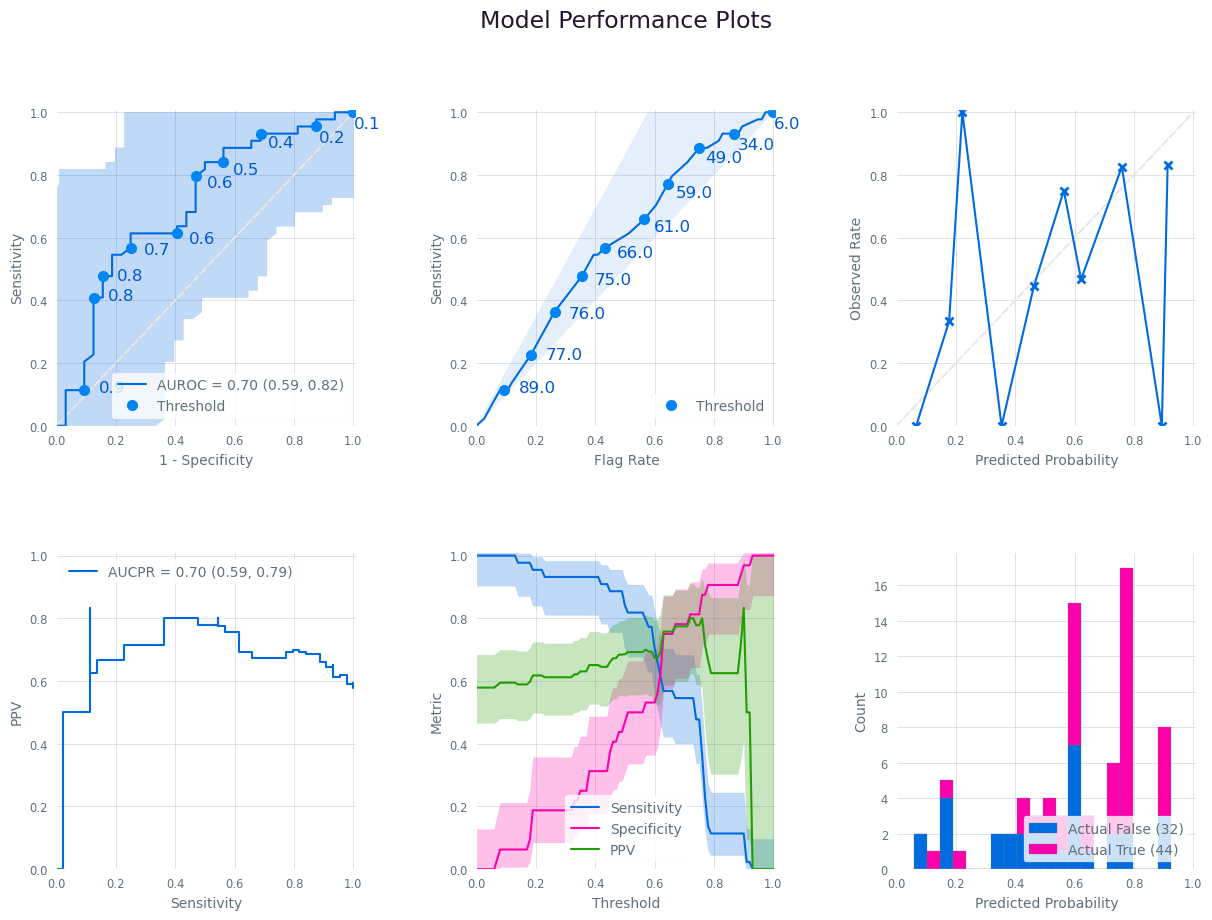

Computing feature importance via permutation shuffling for 2 features using 76 rows with 5 shuffle sets...
	0.71s	= Expected runtime (0.14s per shuffle set)
	0.29s	= Actual runtime (Completed 5 of 5 shuffle sets)


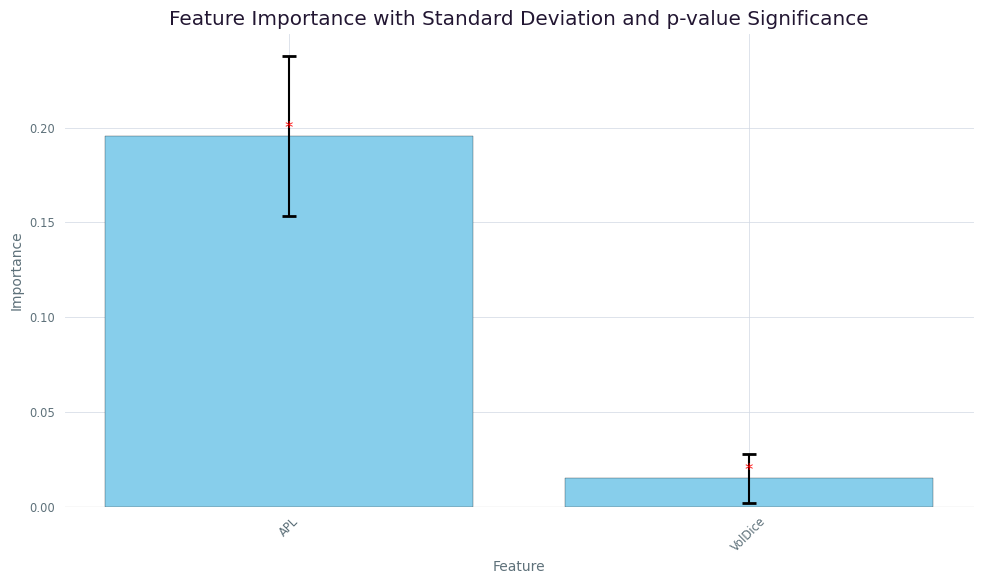

In [3]:
from AutoML.trainer import AutoMLSupervised

trainer = AutoMLSupervised(task='binary', reduction_method='corr')
trainer.run(data, 'Targ', exclude=['OAR', 'patient', 'MAR'], stratify_on='OAR')